<a href="https://colab.research.google.com/github/04-5h/ecole/blob/main/tm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Mining (English) Project Code

*   목표: 트위터 데이터를 수집하고 다양한 텍스트 분석 방법으로 분석하고 의미있는 결과를 얻자


*   Crawling
*   전처리
*   Word Cloud
*   감성분석
*   토픽분석









# SNS crawling를 사용하고 데이터 수집


*   snscrape를 사용 (https://github.com/JustAnotherArchivist/snscrape)


In [128]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [130]:
#검색하고 싶은 단어
search_word = "떡볶이"

#검색하는 기간
start_day = "2022-10-13"
end_day = "2022-10-14"

search_query = search_word + ' since:' + start_day + ' until:' + end_day 

#지정한 기간에서 검색하고 싶은 단어를 포함한 tweet를 취득
scraped_tweets = sntwitter.TwitterSearchScraper(search_query).get_items()

In [131]:
#처음부터 1000개의 tweets를 취득
sliced_scraped_tweets = itertools.islice(scraped_tweets, 1000)

In [132]:
#pandas DataFrame으로 변환
df = pd.DataFrame(sliced_scraped_tweets)

In [133]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/hyemiable89/status/1580709...,2022-10-13 23:59:27+00:00,아침 댓바람부터 떡볶이가 땡기는게 컨디션이 좋구만,1580709835523633154,hyemiable89,[],,[],
1,https://twitter.com/A_fkdleps/status/158070982...,2022-10-13 23:59:25+00:00,휴 나선 바뀌는지는 몰라도 무튼 오늘 12층 해줘따…역시 언제나처럼 6별을 모았구먼...,1580709825305976832,A_fkdleps,[],,[],
2,https://twitter.com/shrimpyeyong/status/158070...,2022-10-13 23:57:04+00:00,@samnip0205 아니.,1580709235897532418,shrimpyeyong,[],,[],
3,https://twitter.com/ziru1102/status/1580709060...,2022-10-13 23:56:22+00:00,@3AaECG9xPhXtNFx 아헉......저는 떡볶이 국물파라 그럼 아예 떡볶이...,1580709060655321088,ziru1102,[],,[],
4,https://twitter.com/baghyem01494454/status/158...,2022-10-13 23:56:17+00:00,"""걸작떡볶이치킨, 곧 말레이시아서도 만나요"" https://t.co/b5L5Go...",1580709037468811264,baghyem01494454,[http://www.newspic.kr/view.html?nid=202210140...,http://www.newspic.kr/view.html?nid=2022101408...,[https://t.co/b5L5Go8Me2],https://t.co/b5L5Go8Me2
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/hongsam1019/status/1580531...,2022-10-13 12:09:29+00:00,@ukee02 \n야심한 시각에 사온 떡볶이자랑 https://t.co/oswwQJ...,1580531164112355328,hongsam1019,[],,[],
996,https://twitter.com/Saksak_saki/status/1580531...,2022-10-13 12:09:03+00:00,떡볶이...한입이라도 좋으니까 맛있는걸 대박 먹고싶었는데\n직접 조리 &gt; 실패...,1580531059065700355,Saksak_saki,[],,[],
997,https://twitter.com/umakemefeel12/status/15805...,2022-10-13 12:08:37+00:00,떡볶이먹었어 https://t.co/k6V1wuZsyc,1580530947287814145,umakemefeel12,[],,[],
998,https://twitter.com/OneulBab/status/1580530927...,2022-10-13 12:08:32+00:00,피자랑 오븐스파게티 시켜먹을까\n돈쫄 시켜먹을까\n어제 먹다 남긴 치킨이랑 떡볶이 ...,1580530927281004544,OneulBab,[],,[],


# content에 keyword가 없고 username에 keyword가 있는 경우도 있어서 그런 경우를 제거하자

In [134]:
df = df[df['content'].str.contains('떡볶이|떡 볶 이|떡볶 이|떡 볶이')]
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/hyemiable89/status/1580709...,2022-10-13 23:59:27+00:00,아침 댓바람부터 떡볶이가 땡기는게 컨디션이 좋구만,1580709835523633154,hyemiable89,[],,[],
3,https://twitter.com/ziru1102/status/1580709060...,2022-10-13 23:56:22+00:00,@3AaECG9xPhXtNFx 아헉......저는 떡볶이 국물파라 그럼 아예 떡볶이...,1580709060655321088,ziru1102,[],,[],
4,https://twitter.com/baghyem01494454/status/158...,2022-10-13 23:56:17+00:00,"""걸작떡볶이치킨, 곧 말레이시아서도 만나요"" https://t.co/b5L5Go...",1580709037468811264,baghyem01494454,[http://www.newspic.kr/view.html?nid=202210140...,http://www.newspic.kr/view.html?nid=2022101408...,[https://t.co/b5L5Go8Me2],https://t.co/b5L5Go8Me2
5,https://twitter.com/H0LDM3ND1V3/status/1580709...,2022-10-13 23:56:16+00:00,블랙로제떡볶이 https://t.co/KSg1KqxWF8,1580709035560808450,H0LDM3ND1V3,[https://twitter.com/500ml7_/status/1453240510...,https://twitter.com/500ml7_/status/14532405109...,[https://t.co/KSg1KqxWF8],https://t.co/KSg1KqxWF8
6,https://twitter.com/tnsenqn08/status/158070898...,2022-10-13 23:56:05+00:00,부대집이나 개인집(없음)이나 누가들어오던지말던지..인데 들어와있는거 마주치면놀라긴함...,1580708987732828161,tnsenqn08,[],,[],
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/hongsam1019/status/1580531...,2022-10-13 12:09:29+00:00,@ukee02 \n야심한 시각에 사온 떡볶이자랑 https://t.co/oswwQJ...,1580531164112355328,hongsam1019,[],,[],
996,https://twitter.com/Saksak_saki/status/1580531...,2022-10-13 12:09:03+00:00,떡볶이...한입이라도 좋으니까 맛있는걸 대박 먹고싶었는데\n직접 조리 &gt; 실패...,1580531059065700355,Saksak_saki,[],,[],
997,https://twitter.com/umakemefeel12/status/15805...,2022-10-13 12:08:37+00:00,떡볶이먹었어 https://t.co/k6V1wuZsyc,1580530947287814145,umakemefeel12,[],,[],
998,https://twitter.com/OneulBab/status/1580530927...,2022-10-13 12:08:32+00:00,피자랑 오븐스파게티 시켜먹을까\n돈쫄 시켜먹을까\n어제 먹다 남긴 치킨이랑 떡볶이 ...,1580530927281004544,OneulBab,[],,[],


# 텍스트 데이터를 전처리

In [135]:
# df의 열 정보를 확인
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [136]:
#data frame에서 텍스트 데이터 열만 추출
df.content

0                            아침 댓바람부터 떡볶이가 땡기는게 컨디션이 좋구만
3      @3AaECG9xPhXtNFx 아헉......저는 떡볶이 국물파라 그럼 아예 떡볶이...
4      "걸작떡볶이치킨, 곧 말레이시아서도 만나요"   https://t.co/b5L5Go...
5                        블랙로제떡볶이 https://t.co/KSg1KqxWF8
6      부대집이나 개인집(없음)이나 누가들어오던지말던지..인데 들어와있는거 마주치면놀라긴함...
                             ...                        
995    @ukee02 \n야심한 시각에 사온 떡볶이자랑 https://t.co/oswwQJ...
996    떡볶이...한입이라도 좋으니까 맛있는걸 대박 먹고싶었는데\n직접 조리 &gt; 실패...
997                       떡볶이먹었어 https://t.co/k6V1wuZsyc
998    피자랑 오븐스파게티 시켜먹을까\n돈쫄 시켜먹을까\n어제 먹다 남긴 치킨이랑 떡볶이 ...
999                 떡볶이먹은후기:씹뱉하고싶엇음내가이걸왜먹고잇는지존나자괴감들고짜증낫음
Name: content, Length: 873, dtype: object

In [137]:
# 각 트위트의 특징을 확인
for tweet in df.content:
  print(tweet)

아침 댓바람부터 떡볶이가 땡기는게 컨디션이 좋구만
@3AaECG9xPhXtNFx 아헉......저는 떡볶이 국물파라 그럼 아예 떡볶이를 먹는 쪽이 좋겟ㄷ군요...그치만 먼가 흥미가 생겻어요 저 만약에 나중에 먹음 후기 올리러 올게요👍
"걸작떡볶이치킨, 곧 말레이시아서도 만나요"   https://t.co/b5L5Go8Me2
블랙로제떡볶이 https://t.co/KSg1KqxWF8
부대집이나 개인집(없음)이나 누가들어오던지말던지..인데 들어와있는거 마주치면놀라긴함
떡볶이집에서 봃드모트만난기분임
예쁜스카프
떡볶이
충북피시방
헌터의도발
수원호텔
보고싶은슬찌개무 https://t.co/7Redjy69am
3. 떡볶이 먹어보기
"걸작떡볶이치킨, 곧 말레이시아서도 만나요"  https://t.co/Oljlmtt82b
"걸작떡볶이치킨, 곧 말레이시아서도 만나요"  https://t.co/36AlMuIpxW
떡볶이 순대 먹고시퍼 ㅠㅠ
박찬열 드라마 박찬열 영화 박찬열 군뮤 박찬열 NNG 박찬열 유튜브  박찬열 작사 박찬열 작곡 박찬열 타투 박찬열 더박스 박찬열 화보 박찬열 향수 박찬열 프라다 박찬열 ost 박찬열 떡볶이 박찬열 아디파 박찬열 더박스 박찬열 키 박찬열 볼링 박찬열 타미힐피거  #CHANYEOL #찬열 #박찬열 https://t.co/2sCCgWbBs2
쌀떡볶이손ㅠㅠㅠㅠㅠㅠㅠ https://t.co/BmIr53dRsQ
“너 그거 아니? 떡볶이 좋아하는 사람 치고 나쁜 사람 없어.” https://t.co/IhpYij14vr
@Tom_980905 떡볶이는 못참지🤣🤣🤣🤣
@kkuni94_ 응핰ㅋㅋㅋㅋ 중학생때 비밀통로가 있어서 글로 빠져나가서 떡볶이 먹은적 있엉
409531
여러 가지로 생활이 편리했다. 한국 슈퍼도 많았고 식당도 많았고 무엇보다 순대국밥을 먹고 싶을 때 마다 사 먹을 수 있었고 #암캐 좋아요 떡볶이를 사 먹을 수도 있었다. 포레스트힐에 집을 정할 수 있는 탓에
오늘은 머먹지
떡볶이에. . .떡볶이랑. ..떡뽁이를 먹을가
유미의세포들떡볶이 공주시캠핑

# 불요어(stop words)랑 불필요한 기호 등을 제거

In [138]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [140]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

불요어 추가

In [141]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt", '떡', '볶', '이', '떡볶', '볶이']) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [142]:
import re
# 트위터분석을 위한 기본적인 텍스트 cleaning 함수
def CleanText(readData, Num=True, Eng=True):
    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())

    return text


tweet를 하나하나 불러오고 stopwords를 제거

In [143]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  print("---------------------")
  print("전처리 전:", word_tokenize(tweet))
  print("전처리 후:", cleaned_tweet)
  print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

---------------------
전처리 전: ['아침', '댓바람부터', '떡볶이가', '땡기는게', '컨디션이', '좋구만']
전처리 후: ['아침', '댓바람부터', '떡볶이가', '땡기는게', '컨디션이', '좋구만']
---------------------
---------------------
전처리 전: ['@', '3AaECG9xPhXtNFx', '아헉', '......', '저는', '떡볶이', '국물파라', '그럼', '아예', '떡볶이를', '먹는', '쪽이', '좋겟ㄷ군요', '...', '그치만', '먼가', '흥미가', '생겻어요', '저', '만약에', '나중에', '먹음', '후기', '올리러', '올게요👍']
전처리 후: ['아헉', '저는', '떡볶이', '국물파라', '그럼', '아예', '떡볶이를', '먹는', '쪽이', '좋겟ㄷ군요', '그치만', '먼가', '흥미가', '생겻어요', '저', '만약에', '나중에', '먹음', '후기', '올리러', '올게요']
---------------------
---------------------
전처리 전: ['``', '걸작떡볶이치킨', ',', '곧', '말레이시아서도', '만나요', "''", 'https', ':', '//t.co/b5L5Go8Me2']
전처리 후: ['걸작떡볶이치킨', '곧', '말레이시아서도', '만나요']
---------------------
---------------------
전처리 전: ['블랙로제떡볶이', 'https', ':', '//t.co/KSg1KqxWF8']
전처리 후: ['블랙로제떡볶이']
---------------------
---------------------
전처리 전: ['부대집이나', '개인집', '(', '없음', ')', '이나', '누가들어오던지말던지', '..', '인데', '들어와있는거', '마주치면놀라긴함', '떡볶이집에서', '봃드모트만난기분임']
전처리 후: ['부대집이나', '개인집', '없음'

In [144]:
len(cleaned_tweets_all)

873

# (Option) 한국어로 텍스트 전처리 하고 싶을 때...


*   konlpy (https://konlpy.org/ko/latest/index.html)
*   (추천)customized_konlpy (https://github.com/lovit/customized_konlpy)



In [145]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
from ckonlpy.tag import Twitter

In [147]:
twitter = Twitter()
twitter.pos("안녕하세요. 저는 인공지능 입니다.")

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공', 'Noun'),
 ('지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

# 새로운 단어를 형태소 분석기가 참조하는 사전에 추가하는 방법

In [148]:
#"인공지능"을 한 단어로 인식 시키기 위해 사전에 추가 해서 처리
twitter.add_dictionary(['인공지능'], 'Noun')

In [149]:
#사전에 "인공지능"이 추가된 효과가 반영
twitter.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

불요어(stopwords) 제거

In [150]:
from ckonlpy.tag import Postprocessor

In [151]:
stopwords = {"저", "는"}
postprocessor = Postprocessor(twitter, stopwords=stopwords)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

명사("Noun")만 보고 싶어

In [152]:
passtags = {'Noun'}
postprocessor = Postprocessor(twitter, stopwords=stopwords, passtags=passtags)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'), ('인공지능', 'Noun')]

나머지 기능은 홈페이지 (https://github.com/lovit/customized_konlpy) 참조

# Word Cloud 만들기

In [153]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# word cloud를 만드는 함수를 생성

In [155]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

Word Cloud를 위해 단어의 리스트 모든 단어를 한 문자열으로 연결

In [156]:
all_words = []
for cleaned_tweet in cleaned_tweets_all:
  for word in cleaned_tweet:
    all_words.append(word)

all_words_str = ' '.join(all_words)

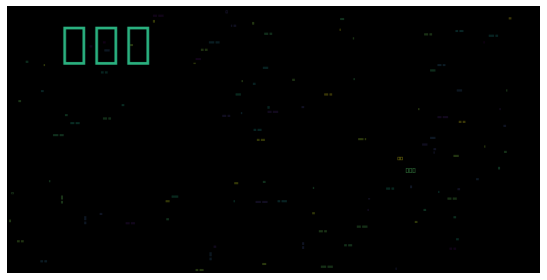

In [157]:
generate_wordcloud(all_words_str)

In [158]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
The following pa

In [159]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
def generate_wordcloud_korean(text): 
    wordcloud = WordCloud(
                          font_path = FONT_PATH,
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

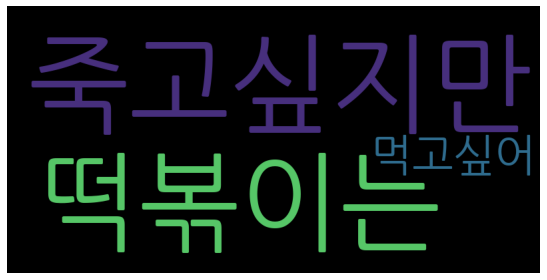

In [160]:
generate_wordcloud_korean("죽고싶지만 떡볶이는 먹고싶어.")

# 감성분석

In [161]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
import nltk
nltk.download([ "stopwords",  "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [163]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

sentiment analysis check

In [164]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

# (option) 한국어로 간단하게 감성분석 하는 방법:google Translate

In [165]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
from googletrans import Translator
translator = Translator()
original_text = '안녕하세요. 역시 파이썬은 너무 좋네요'
translations = translator.translate(original_text, 'en')
print(original_text)
print(translations.text)
translated_text = translations.text

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(translated_text)

안녕하세요. 역시 파이썬은 너무 좋네요
hello.After all, Python is so good


{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.5777}

# 데이터셋 전체에 대해서 Sentiment Analysis 실행

In [167]:
sentiment_result = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  cleaned_tweet_str = ' '.join(cleaned_tweet)
  print("전처리 전: " + tweet)
  print("전처리 후: " + cleaned_tweet_str)
  print(sia.polarity_scores(cleaned_tweet_str))

  #positive or negative 분류 compound score가 0 보다 크면 positive, 이하는 negative로 함
  compound_point = sia.polarity_scores(cleaned_tweet_str)['compound']
  if compound_point > 0:
    sentiment_result.append('Positive')

  else:
    sentiment_result.append('Negative')

전처리 전: 아침 댓바람부터 떡볶이가 땡기는게 컨디션이 좋구만
전처리 후: 아침 댓바람부터 떡볶이가 땡기는게 컨디션이 좋구만
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: @3AaECG9xPhXtNFx 아헉......저는 떡볶이 국물파라 그럼 아예 떡볶이를 먹는 쪽이 좋겟ㄷ군요...그치만 먼가 흥미가 생겻어요 저 만약에 나중에 먹음 후기 올리러 올게요👍
전처리 후: 아헉 저는 떡볶이 국물파라 그럼 아예 떡볶이를 먹는 쪽이 좋겟ㄷ군요 그치만 먼가 흥미가 생겻어요 저 만약에 나중에 먹음 후기 올리러 올게요
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: "걸작떡볶이치킨, 곧 말레이시아서도 만나요"   https://t.co/b5L5Go8Me2
전처리 후: 걸작떡볶이치킨 곧 말레이시아서도 만나요
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: 블랙로제떡볶이 https://t.co/KSg1KqxWF8
전처리 후: 블랙로제떡볶이
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: 부대집이나 개인집(없음)이나 누가들어오던지말던지..인데 들어와있는거 마주치면놀라긴함
떡볶이집에서 봃드모트만난기분임
전처리 후: 부대집이나 개인집 없음 이나 누가들어오던지말던지 인데 들어와있는거 마주치면놀라긴함 떡볶이집에서 봃드모트만난기분임
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: 예쁜스카프
떡볶이
충북피시방
헌터의도발
수원호텔
보고싶은슬찌개무 https://t.co/7Redjy69am
전처리 후: 예쁜스카프 떡볶이 충북피시방 헌터의도발 수원호텔 보고싶은슬찌개무
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: 3. 떡볶이 먹어보기


감성분석의 시각화

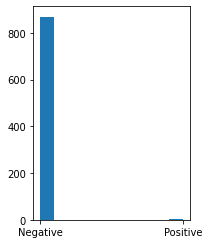

In [168]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3.0, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.hist(sentiment_result)

# Display the plot
plt.show()

# Topic Analysis

In [169]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [171]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaSeqModel, LdaModel

In [172]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  # print("---------------------")
  # print("전처리 전:", word_tokenize(tweet))
  # print("전처리 후:", cleaned_tweet)
  # print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

In [173]:
id2word = Dictionary(cleaned_tweets_all)
corpus = [id2word.doc2bow(text) for text in cleaned_tweets_all]

In [174]:
topic_number = 10 #10개의 topic group로 나눔

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_number,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

In [175]:
for topic_topwords in lda_model.print_topics():
  print(topic_topwords)

(0, '0.018*"이제" + 0.015*"세트" + 0.014*"떡볶이랑" + 0.014*"튀김" + 0.013*"줄" + 0.012*"좀" + 0.008*"이거" + 0.007*"좋아" + 0.007*"만들어서" + 0.007*"생각"')
(1, '0.022*"떡볶이" + 0.015*"거" + 0.013*"하는" + 0.012*"난" + 0.011*"같이" + 0.011*"또" + 0.009*"떡볶이에" + 0.008*"이렇게" + 0.008*"왜" + 0.006*"먹고싶어"')
(2, '0.045*"떡볶이" + 0.015*"저" + 0.013*"먹음" + 0.012*"내일" + 0.011*"개" + 0.007*"어제" + 0.007*"하" + 0.007*"먹어서" + 0.007*"먹는" + 0.006*"밥"')
(3, '0.022*"너무" + 0.018*"떡볶이" + 0.015*"사람" + 0.012*"더" + 0.012*"좋아하는" + 0.010*"아니" + 0.009*"다" + 0.007*"ㅋㅋ" + 0.007*"먹고" + 0.005*"부산"')
(4, '0.035*"오늘" + 0.020*"먹고" + 0.019*"먹었다" + 0.018*"싶다" + 0.017*"진짜" + 0.015*"나는" + 0.015*"아" + 0.013*"떡볶이를" + 0.012*"떡볶이도" + 0.012*"너무"')
(5, '0.138*"떡볶이" + 0.014*"안" + 0.012*"좋다" + 0.011*"이" + 0.010*"집에" + 0.008*"한" + 0.008*"보고" + 0.006*"매운" + 0.006*"잘" + 0.006*"인분"')
(6, '0.060*"떡볶이" + 0.022*"나" + 0.017*"먹고싶다" + 0.013*"먹고" + 0.009*"치킨" + 0.009*"그냥" + 0.007*"마라탕" + 0.006*"일" + 0.005*"먹어" + 0.005*"핫도그"')
(7, '0.019*"떡볶이는" + 0.008*"진짜" + 0.007*"가서" + 0.

# 향후 방향


*   본인이 조사 하고 싶은 key word를 정해서 분석
*   년도별, 월별의 변화를 관찰

*   토픽별 감성 비교
*   여러개의 key word를 사용해서 결과 비교 (Ex, galaxy vs iphone) 





# 참고자료


*   https://www.nltk.org/
*   https://radimrehurek.com/gensim/

*   https://huggingface.co/ (for Deep Learning Models in NLP)
*   https://en.wikipedia.org/wiki/Word_embedding (Word Embedding 는 현재 NLP에서의 핵심 기술)

*  reference Dr.야마다님



